### 
Group - 9<br>
Rathlavath Vishal - 24EE10081<br>
Rishabh Sethia - 24EE10082<br>
Rohit Kumar - 24EE10083<br>

## Interpreting the Dataset 

Target attribute - Car acceptibility<br>
Attributes - buying,maint,doors,persons,lug_boot,safety<br>


Number of attributres -  6<br>
Number of instances - 1728<br>

# Meaning of the attibute names <br>
buying - buying price<br>
maint - price of maintenance<br>
doors - number of doors<br> 
persons - capacity in terms of persons to carry<br>
lug_boot - the size of luggage boot<br>
safety - estimated safety of the car<br>

Here we are briefly checking two main attributes with sub inputs<br>
[1]PRICE - Overall price {buying + maint}<br>
[2]TECH - technical comforts<br>
______[2(a)]COMFORT - {doors,persons,lug_boot}<br>
______[2(b)]safety<br>

The model includes three intermediate concepts : PRICE,TECH,COMFORT

### Attribute Values <br>
1. buying - {v-high, high, med, low}<br>
2. maint - {v-high, high, med, low}<br>
3. doors - {2, 3, 4, 5-more}<br>
4. persons - {2, 4, more}<br>
5. lug_boot - {small, med, big}<br>
6. safety - {low, med, high}<br>

Class values : unacc , acc , good , vgood 

# Class Distribution 
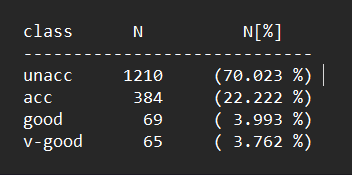

# Preparing the dataset in desired representation

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [67]:
car_data_path = 'car.data'


In [68]:
def prepare_dataset(file_path):
    df = pd.read_csv(file_path , header = None)
    df.columns = ['buying' , 'maint' , 'doors' , 'persons' , 'lug_boot' , 'safety' , 'car_acceptibility']
    target_attribute = df.columns[-1]
    attributes = list(df.columns[:-1])

    return df , target_attribute , attributes

In [69]:
car_data , target_car_attribute , all_attributes = prepare_dataset(car_data_path)
print(car_data)
print("The target attribute which we are trying to learn : ",target_car_attribute)
print("The list of all attributes : ",all_attributes)

     buying  maint  doors persons lug_boot safety car_acceptibility
0     vhigh  vhigh      2       2    small    low             unacc
1     vhigh  vhigh      2       2    small    med             unacc
2     vhigh  vhigh      2       2    small   high             unacc
3     vhigh  vhigh      2       2      med    low             unacc
4     vhigh  vhigh      2       2      med    med             unacc
5     vhigh  vhigh      2       2      med   high             unacc
6     vhigh  vhigh      2       2      big    low             unacc
7     vhigh  vhigh      2       2      big    med             unacc
8     vhigh  vhigh      2       2      big   high             unacc
9     vhigh  vhigh      2       4    small    low             unacc
10    vhigh  vhigh      2       4    small    med             unacc
11    vhigh  vhigh      2       4    small   high             unacc
12    vhigh  vhigh      2       4      med    low             unacc
13    vhigh  vhigh      2       4      med    me

In the calculation of Entropy we use log2(0) = 0

In [70]:
def logarithmic(N):
    if(N==0):
        return 0
    else:
        return np.log2(N)

Entropy Calculation<br>
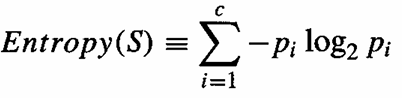

In [75]:
def calculate_entropy(data,targte_attribute):
    class_counts = data[targte_attribute].value_counts()
    total_samples = len(data)
    probabilities = class_counts/total_samples
    entropy = 0
    for p in probabilities : 
        entropy += p*logarithmic(p)
    return -entropy 


In [77]:
entropy_car = calculate_entropy(car_data,target_car_attribute)
print(entropy_car)


1.2057409700121753


Information Gain calculation<br>
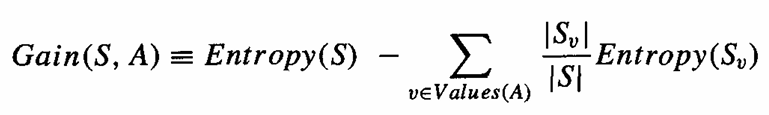

In [88]:
def calculate_gain(data,attributes,target_attribute):
    parent_entropy = calculate_entropy(data,target_attribute)

    gains={}
    weighted_entropies = {}
    for attr in attributes :
        values = data[attr].unique()
        weighted_entropy = 0
        total_samples = len(data)

        for val in values :
            subset = data[data[attr] == val]
            prob = len(subset) / total_samples
            child_entropy = calculate_entropy(subset , target_attribute)
            weighted_entropy += prob*child_entropy

        gains[attr] = parent_entropy - weighted_entropy
        weighted_entropies[attr] = weighted_entropy

    return gains,weighted_entropies



In [79]:
# data - car_data
# attributes - all_attributes
# target_attribute - target_car_attribute 

In [91]:
information_gain_all,weighted_entropies_all = calculate_gain(car_data,all_attributes,target_car_attribute)
print(information_gain_all)
print(weighted_entropies_all)

{'buying': np.float64(0.09644896916961399), 'maint': np.float64(0.07370394692148596), 'doors': np.float64(0.004485716626632108), 'persons': np.float64(0.2196629633399082), 'lug_boot': np.float64(0.030008141247605424), 'safety': np.float64(0.262184356554264)}
{'buying': np.float64(1.1092920008425613), 'maint': np.float64(1.1320370230906893), 'doors': np.float64(1.2012552533855432), 'persons': np.float64(0.9860780066722671), 'lug_boot': np.float64(1.1757328287645699), 'safety': np.float64(0.9435566134579113)}


In [94]:
print(f"{'Attribute':<15} | {'Weighted Entropy':<18} | {'Information Gain':<16}")
print("-" * 55)

# Sorting attributes by Information Gain (descending) to identify the best split
# Using 'all_attributes'  to iterate
sorted_attr = sorted(all_attributes, key=lambda x: information_gain_all[x], reverse=True)

for attr in sorted_attr:
    w_ent = weighted_entropies_all[attr]
    i_gain = information_gain_all[attr]
    print(f"{attr:<15} | {w_ent:<18.6f} | {i_gain:<16.6f}")

# Identifying the Root Node for Setting-0
best_root = sorted_attr[0]
print("-" * 55)
print(f"Best Attribute for Root Node: {best_root}")

Attribute       | Weighted Entropy   | Information Gain
-------------------------------------------------------
safety          | 0.943557           | 0.262184        
persons         | 0.986078           | 0.219663        
buying          | 1.109292           | 0.096449        
maint           | 1.132037           | 0.073704        
lug_boot        | 1.175733           | 0.030008        
doors           | 1.201255           | 0.004486        
-------------------------------------------------------
Best Attribute for Root Node: safety
